# Lead Scoring Case Study

 ## Poblem statment

#### X Education sells online courses to industry professionals.The company marketing their courses digitality and get raw leads from the various sources. The typical lead conversion rate at X education is around 30%. 

#### The X Education wishes to identify the most potential leads, which is also known as ‘Hot Leads’. This hot leads helps to sales departments to increase a conversion rate up to 80%. 


- Reading dataset
- Missing value analysis
- Univariate Analysis
- Bivariate Analysis
- outlier Analysis
- Model preparation
- Model evaluation
- Confusion Matrix
- Lead Score Assing

In [1]:
# Import Libraries

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Import libraries pandas,numpy and matplotlib,seaborn

import numpy as np
import pandas as pd


# the commonly used alias for seaborn is sns
import seaborn as sns
#for visualisations
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Dataset

In [2]:
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_df.shape

(9240, 37)

rows 9240 and columns 37

In [4]:
#Duplicate Data
sum(leads_df.duplicated(subset = 'Prospect ID')) >=2

False

No Duplicates

In [5]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preparation

In [7]:
#Handle select values as many column contains select value which means when user have not selected anything and default value
#comes in the data so lets replace it with null

#replave Select to NaN
leads_df = leads_df.replace('Select', np.nan)

In [8]:
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#null data percentage

df_null = round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)
df_null.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

Analyse all the column having na value

How did you hear about X Education and Lead Profile

In [10]:
#Drop How did you hear about X Education and Lead Profile as it having more than 70% missing value
leads_df = leads_df.drop(['How did you hear about X Education','Lead Profile'],axis=1)

In [11]:
# check for Lead Quality value if possible to imput something
leads_df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [12]:
# If we take a mean of value counts it coming as 895 (approx) so lets replace null with nearest value i.e Not Sure
leads_df['Lead Quality'] = leads_df['Lead Quality'].replace(np.nan, 'Not Sure')

'Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'

In [13]:
# Lets drop Asymmetrique Profile Score, Asymmetrique Profile Index, Asymmetrique Activity Score,Asymmetrique Profile Score
# as it contain more then 45% of null value and not seems so relevant column

leads_df = leads_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1)

City

In [14]:
# check for City value if possible to imput something
leads_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

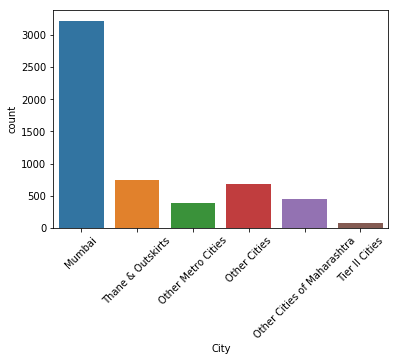

In [15]:
sns.countplot('City',data=leads_df)
plt.xticks(rotation = 45)

As maximum city is Mumbai so lets replace null with Mumbai

In [16]:
leads_df['City'] = leads_df['City'].replace(np.nan, 'Mumbai')

Specialization

In [17]:
# check for Specialization value if possible to imput something
leads_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [18]:
# As data is distrbuted so lets replace null with Others occupation
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan, 'Others')

Tags

In [19]:
# check for Tags value if possible to imput something
leads_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [20]:
# As mostly values are 'Will revert after reading the email' so lets replace null with it.
leads_df['Tags'] = leads_df['Tags'].replace(np.nan, 'Will revert after reading the email')

What matters most to you in choosing a course

In [21]:
# check for What matters most to you in choosing a course value if possible to imput something
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
# As mostly values are 'Better Career Prospects' so lets replace null with it.
leads_df['What matters most to you in choosing a course'] = leads_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

What is your current occupation

In [23]:
# check for What is your current occupation value if possible to imput something
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
# As mostly values are 'Unemployed' so lets replace null with it.
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

Country

In [25]:
# check for Country value if possible to imput something
leads_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Germany                    4
Kuwait                     4
Nigeria                    4
South Africa               4
Sweden                     3
China                      2
Ghana                      2
Bangladesh                 2
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Italy                      2
Belgium                    2
Philippines                2
Vietnam                    1
Liberia                    1
Russia                     1
Sri Lanka                  1
Tanzania                   1
Switzerland                1
Kenya         

In [26]:
# As mostly values are 'India' so lets replace null with it.
leads_df['Country'] = leads_df['Country'].replace(np.nan, 'India')

In [27]:
#check again null data percentage

df_null = round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)
df_null.sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
What matters most to you in choosing a course    0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
Search                                           0.00
A free copy of Mastering The Interview           0.00
Magazine                                         0.00
Newspaper Article           

In [28]:
#Lets drop the rows as missing values are less then 2%
leads_df.dropna(inplace = True)

In [29]:
#check again null data percentage

df_null = round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)
df_null.sort_values(ascending=False)

Last Notable Activity                            0.0
What matters most to you in choosing a course    0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
Magazine                                         0.0
Newspaper Article                             

In [30]:
leads_df.shape 
#(9240, 37)

(9074, 31)

#### So we dropped 6 columns and 166 rows

In [31]:
#Copy it new datframe

df = leads_df

### Exploratory Data Analysis

#### Univariate Analysis

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

In [33]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


Data is balanced or imbalanced

In [34]:
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
#Data is balanced or imbalanced

temp = df["Converted"].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df1.iplot(kind='pie',labels='labels',values='values', title='Converted or not')

Data is not imbalanced

#### Function to show percentage of values

In [35]:
def plot_variable(col_name):
    
    total = len(df)
    plt.figure(figsize=(10,6))
    ax = sns.countplot(x=col_name, hue='Converted', data=df)
    plt.title('% '+col_name)
    plt.xticks(rotation=90)
    #plt.xlabel('Number of Axles')
    plt.ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), 
                ha='center', va='bottom',weight='bold') # set the alignment of the text

    #adjust the ticklabel to the desired format, without changing the position of the ticks. 
    _ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

#### Identify the Numerical and Categorical variables from the dataset¶

In [36]:
df.info()

# so there are 3 types (float64,int64,object)
# show only numerical columns
df_num = df.select_dtypes(include = ['float64', 'int64'])

df_cat = df.select_dtypes(include = ['object'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
Prospect ID                                      9074 non-null object
Lead Number                                      9074 non-null int64
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Converted                                        9074 non-null int64
TotalVisits                                      9074 non-null float64
Total Time Spent on Website                      9074 non-null int64
Page Views Per Visit                             9074 non-null float64
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 

In [37]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
Prospect ID                                      9074 non-null object
Lead Origin                                      9074 non-null object
Lead Source                                      9074 non-null object
Do Not Email                                     9074 non-null object
Do Not Call                                      9074 non-null object
Last Activity                                    9074 non-null object
Country                                          9074 non-null object
Specialization                                   9074 non-null object
What is your current occupation                  9074 non-null object
What matters most to you in choosing a course    9074 non-null object
Search                                           9074 non-null object
Magazine                                         9074 non-null object
Newspaper Article                                9074

#### Univariate Analysis for Categorical Columns

In [38]:
df_cat = df_cat.drop(['Prospect ID'],1)

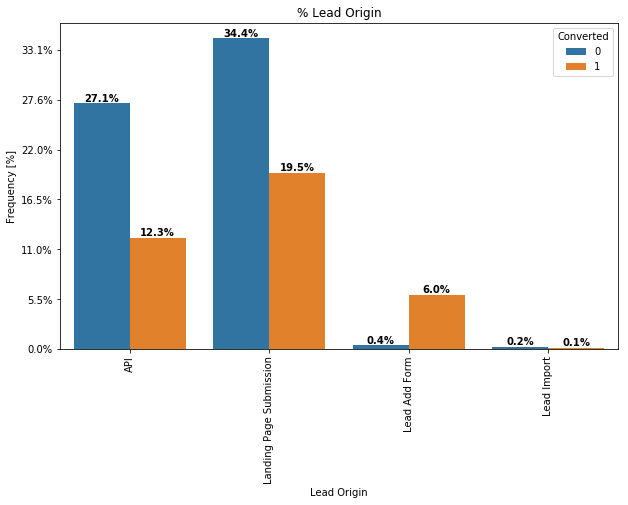

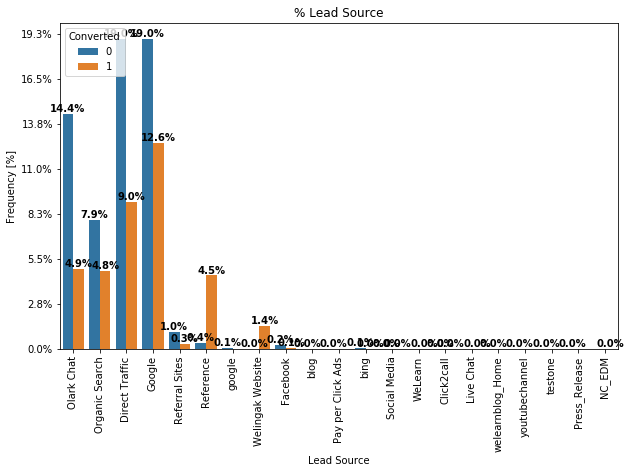

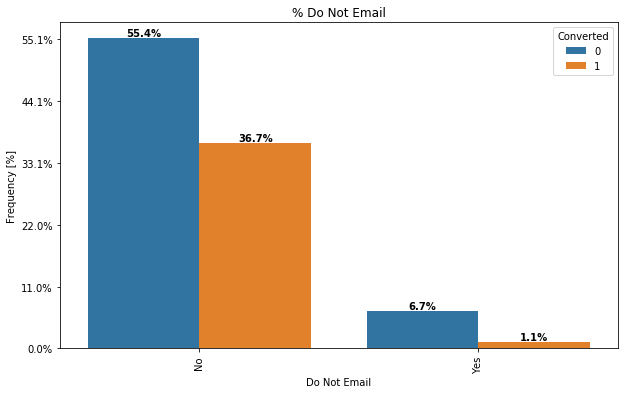

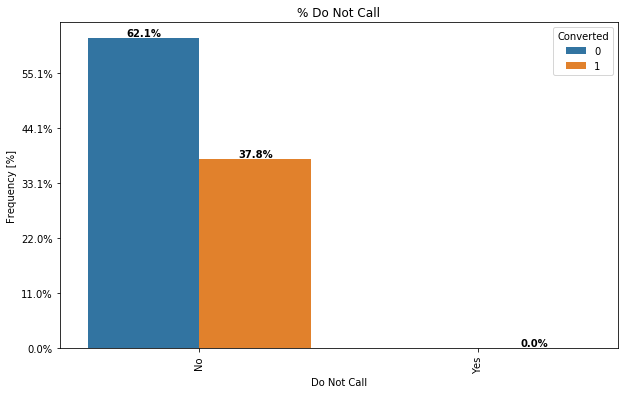

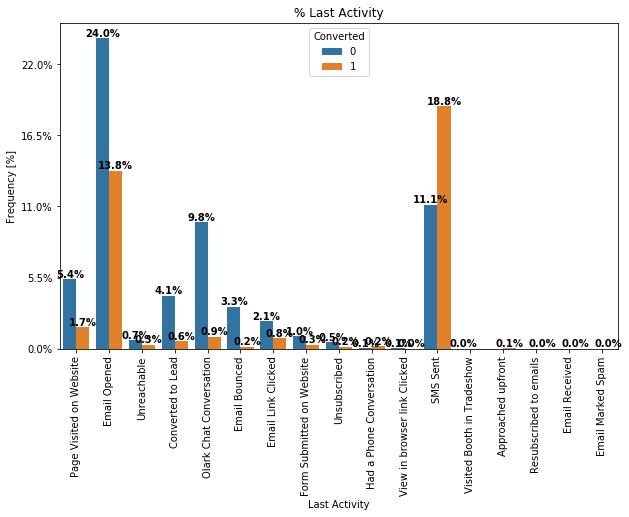

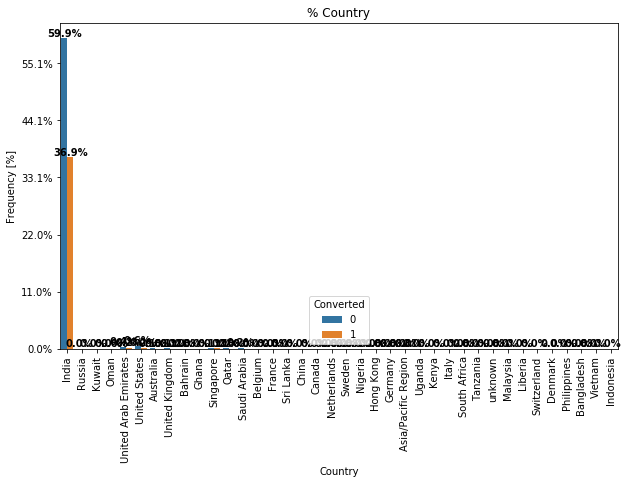

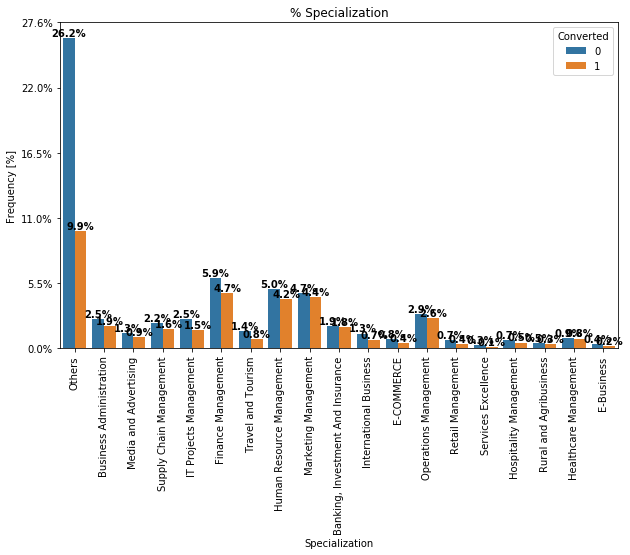

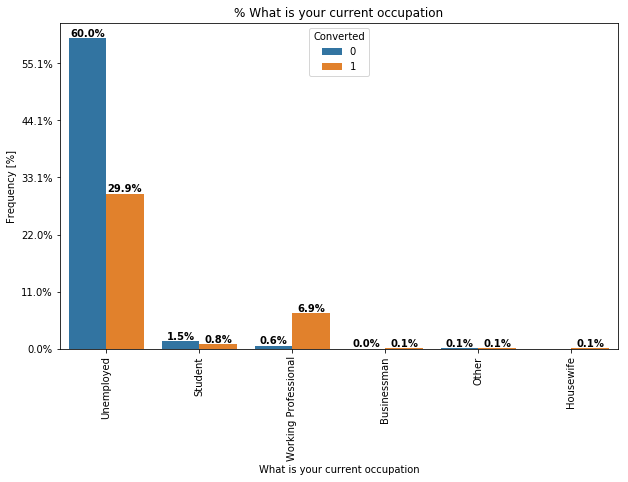

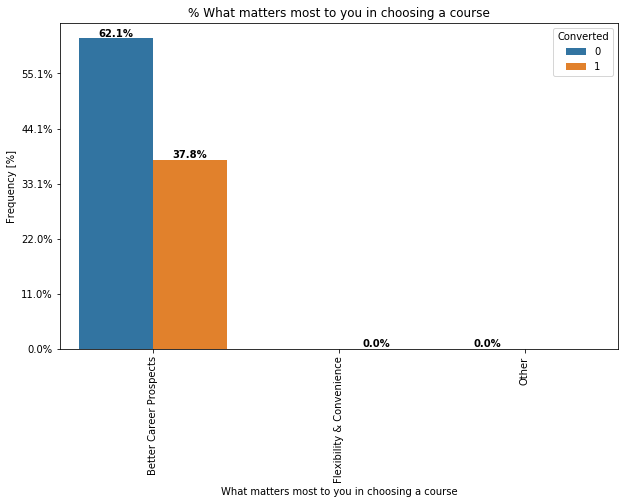

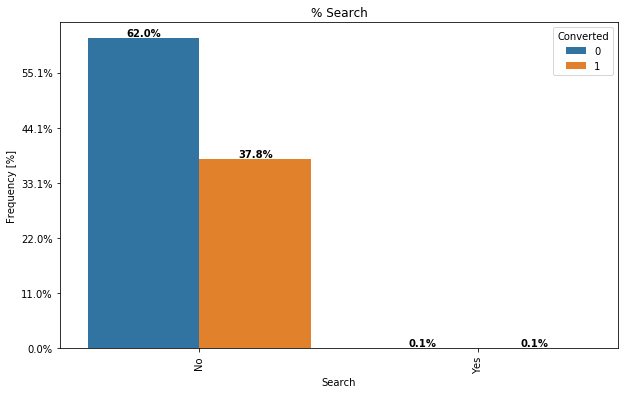

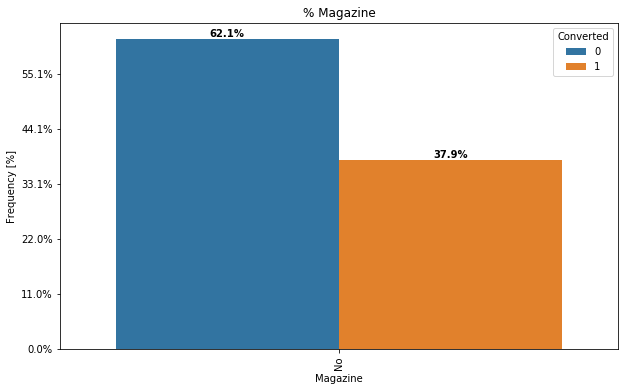

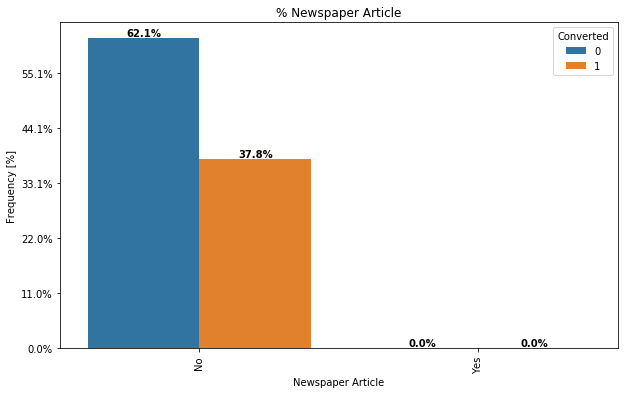

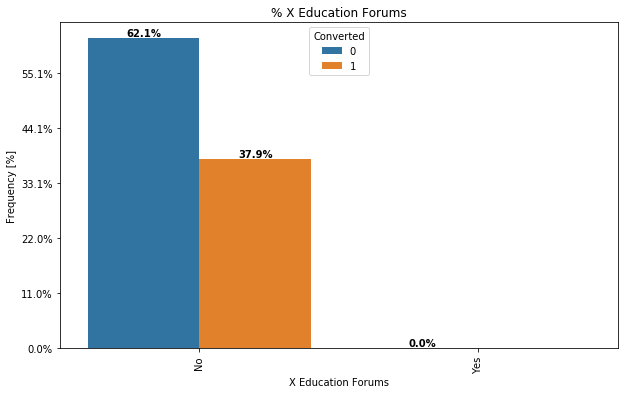

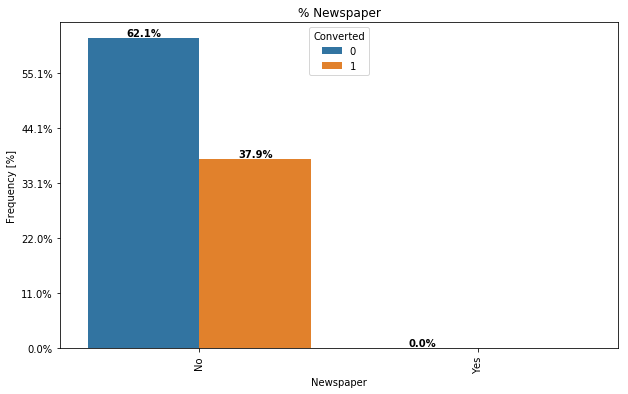

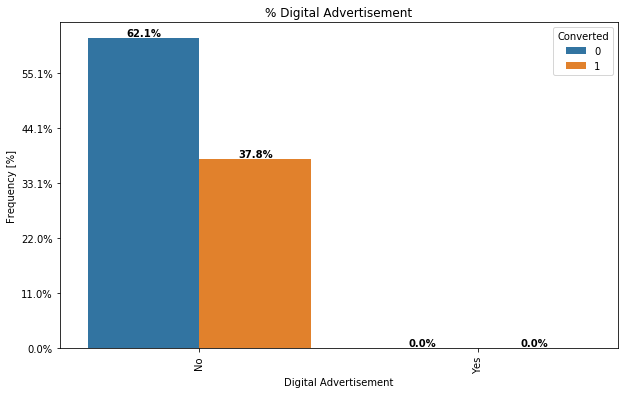

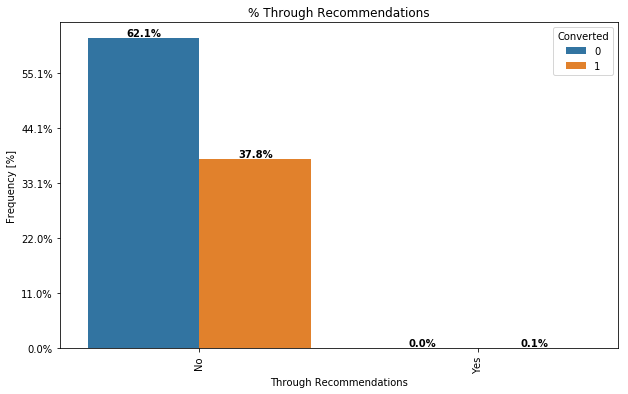

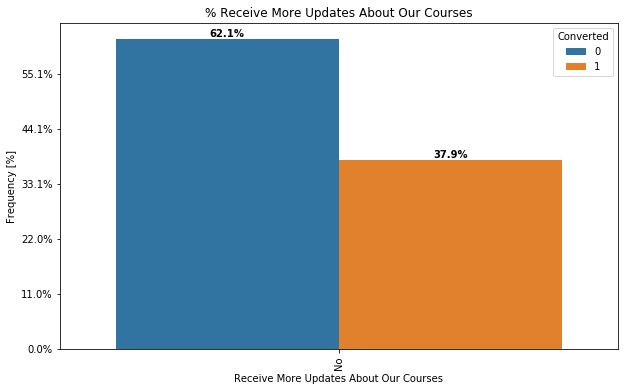

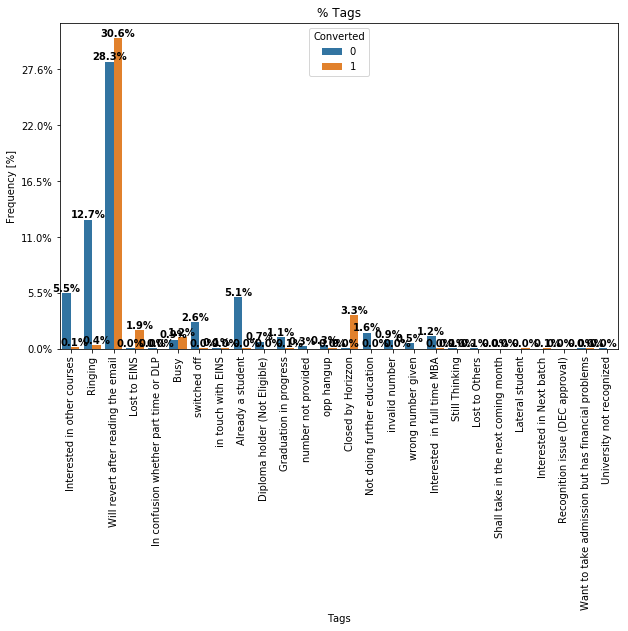

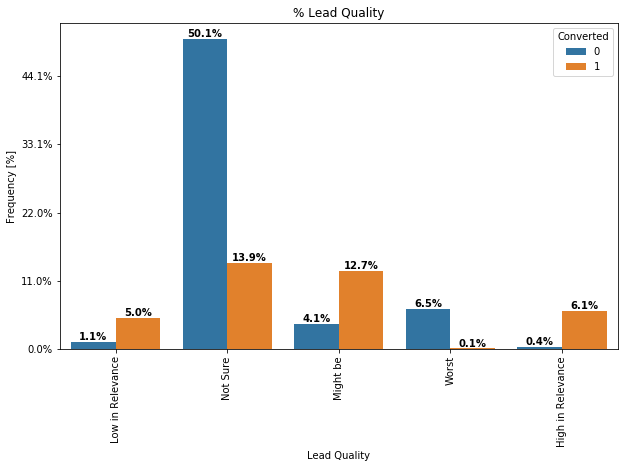

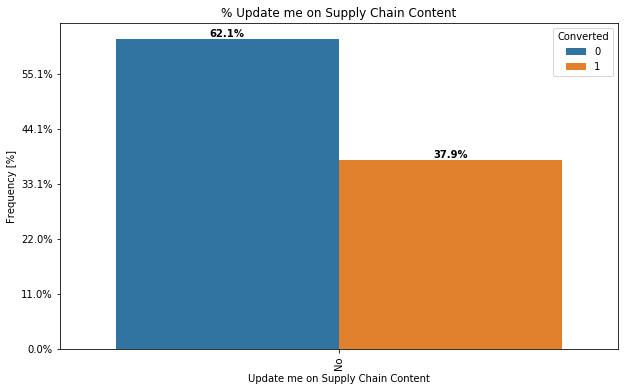

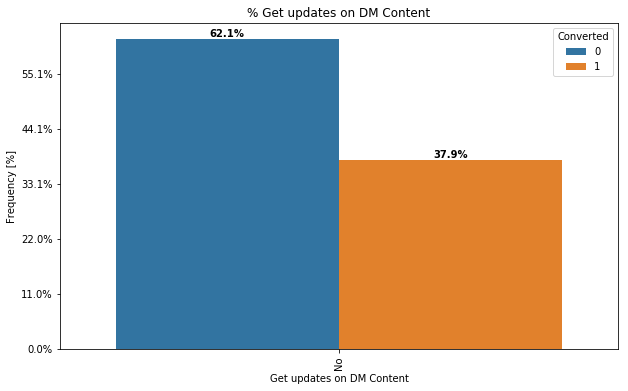

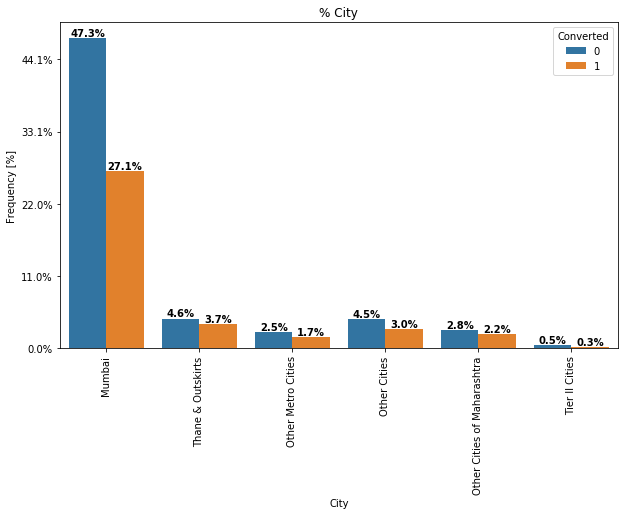

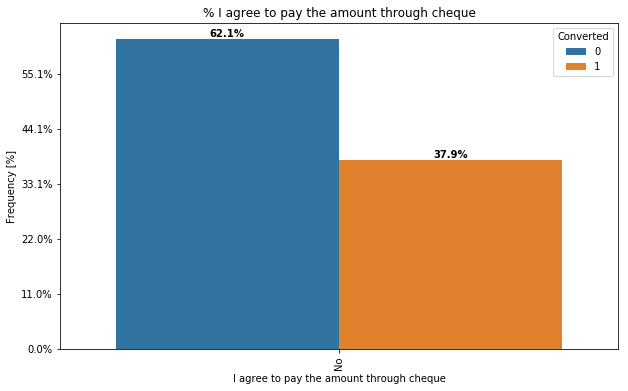

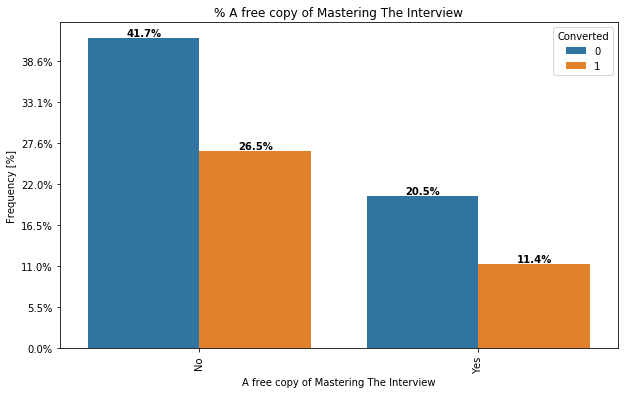

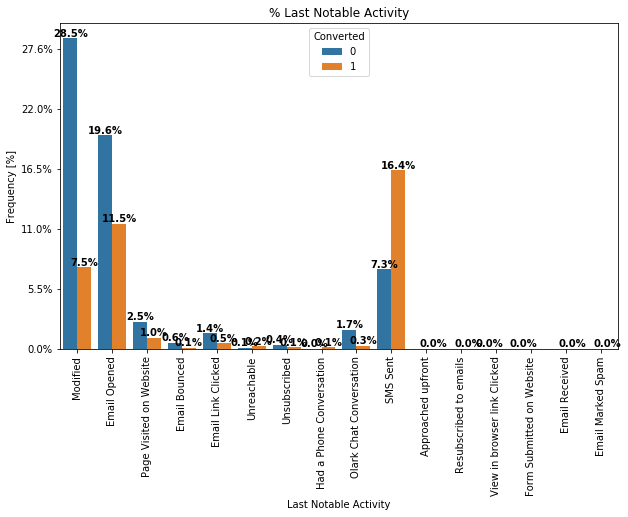

In [39]:
for c in df_cat.columns:
    plot_variable(c)

In [40]:
# In Lead Source there are two spellings for google, lets check out more
df_cat['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
WeLearn                 1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

In [41]:
# correct it google to Google and there are many other search engine having very less value so lets categorize it to others except facebooka and google
df_cat['Lead Source'] = df_cat['Lead Source'].replace(['google'], 'Google')
df_cat['Lead Source'] = df_cat['Lead Source'].replace(['bing','Click2call','Social Media','Press_Release','Live Chat','Pay per Click Ads','testone','NC_EDM', 'welearnblog_Home',
                                                       'blog','WeLearn','youtubechannel'], 'Others_lead_source')

In [42]:
df_cat['Lead Source'].value_counts()

Google                2873
Direct Traffic        2543
Olark Chat            1753
Organic Search        1154
Reference              443
Welingak Website       129
Referral Sites         125
Facebook                31
Others_lead_source      23
Name: Lead Source, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

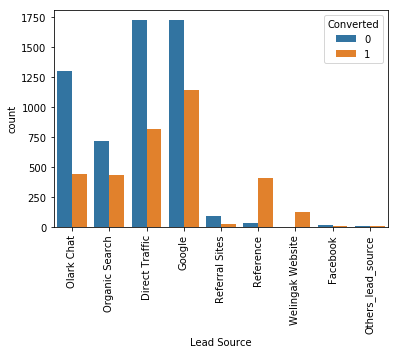

In [43]:
#Plot for Lead Source
sns.countplot(x = "Lead Source", hue = df["Converted"], data = df_cat)
plt.xticks(rotation = 90)

In [44]:
df_cat['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
# Category having less value put it into others column
df_cat['Last Activity'] = df_cat['Last Activity'].replace(['Had a Phone Conversation', 
                        'View in browser link Clicked', 'Approached upfront'
                        ,'Email Received', 'Email Marked Spam','Resubscribed to emails','Visited Booth in Tradeshow'], 'Other_last_activity')

In [46]:
df_cat['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_last_activity            42
Name: Last Activity, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

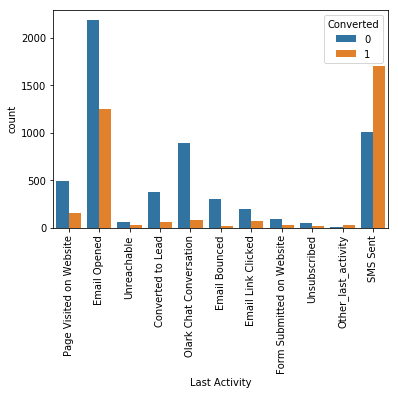

In [47]:
#Plot for Lead Source
sns.countplot(x = "Last Activity", hue = df["Converted"], data = df_cat)
plt.xticks(rotation = 90)

In [48]:
df_cat['Specialization'].value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [49]:
#Replace others
df_cat['Specialization'] = df_cat['Specialization'].replace(['Others'], 'Other_specialization')

In [50]:
df_cat['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [51]:
#Replace others
df_cat['What is your current occupation'] = df_cat['What is your current occupation'].replace(['Other'], 'Other_occupation')

In [52]:
df_cat['Tags'].value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [53]:
df_cat['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [54]:
#Replace others
df_cat['Last Notable Activity'] = df_cat['Last Notable Activity'].replace(['SMS Sent'], 'Last Notable Activity_SMS_Sent')

In [55]:
# Category having less value put it into others column
df_cat['Tags'] = df_cat['Tags'].replace(['in touch with EINS', 
                        'Lost to Others', 'Still Thinking','Want to take admission but has financial problems', 
                        'In confusion whether part time or DLP','Interested in Next batch','Lateral student',
                          'Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'], 'Other_tags')

#### Inferences:
    
1. Lead Origin : Need to add more count in Lead Add Form and need to improve conversion on Lead Origin from API and Landing Form Submission
2. Lead Source : Direct Traffic, Google and Olark chat generated the good count of Leads and conversion rate from Reference and welingak website is high
3. Last Activity : SMS Sent activity have very high conversions and Email Opened people count is high
4. Current Occupation : Unemployed is having good count and Working professionals have very high conversions but its count is less so can focus to increas this count
5. Tags: Tag Will revert after reading a mail have high count and high conversion rate so this can be increased more, tag closed by horizon also have some good conversion rate but low count
6. Lead Quality : the inuition of employee doest not match with the conversion
7. City : Maxmimum count from Mumabi so conversion rate is high for Mumbai. Need to focus on more other cities and increase the count.
8. Columns which are having almost all No values are so no inference:
    'Do Not Call',
	 'Country',
	 'What matters most to you in choosing a course',
	 'Search',
	 'Newspaper Article',
	 'X Education Forums',
	 'Newspaper',
	 'Digital Advertisement',
	 'Through Recommendations',
	 'Receive More Updates About Our Courses',
	 'Update me on Supply Chain Content',
	 'Get updates on DM Content',
	 'I agree to pay the amount through cheque'
    

#### Drop the columns

In [56]:
#drop the columns which are irrelevant and not giving any inference
df_cat = df_cat.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Newspaper Article',
                  'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1)

In [57]:
df_cat.shape

(9074, 12)

#### Univariate Analysis for Numerical Columns

In [58]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 5 columns):
Lead Number                    9074 non-null int64
Converted                      9074 non-null int64
TotalVisits                    9074 non-null float64
Total Time Spent on Website    9074 non-null int64
Page Views Per Visit           9074 non-null float64
dtypes: float64(2), int64(3)
memory usage: 745.3 KB


In [59]:
#Drop target variable 'Converted' and irrelevant 'Lead Number'
df_num = df_num.drop(['Converted','Lead Number'],1)

#### Check for outlier 

In [60]:
#Function to remove outliers
def remove_outlier(col):
    percentiles = df_num[col].quantile([0.05,0.95]).values
    df_num[col][df_num[col] <= percentiles[0]] = percentiles[0]
    df_num[col][df_num[col] >= percentiles[1]] = percentiles[1]

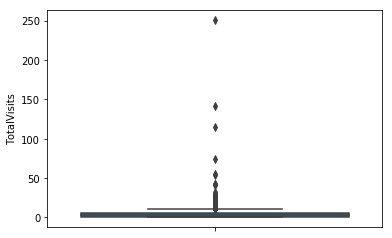

In [61]:
sns.boxplot(y=df_num['TotalVisits'])

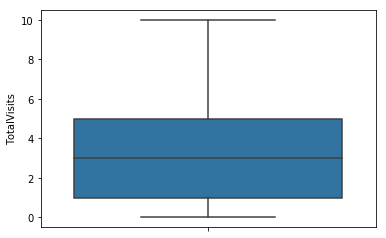

In [62]:
#remove outliers
remove_outlier('TotalVisits')

sns.boxplot(y=df_num['TotalVisits'])

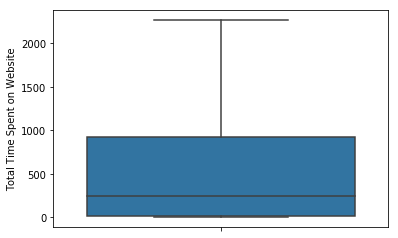

In [63]:
sns.boxplot(y=df_num['Total Time Spent on Website'])

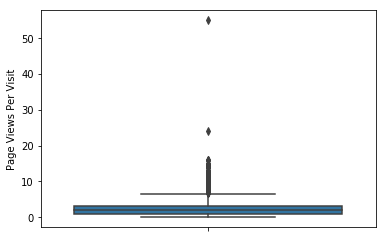

In [64]:
sns.boxplot(y=df_num['Page Views Per Visit'])

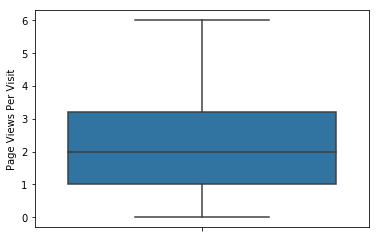

In [65]:
remove_outlier('Page Views Per Visit')

sns.boxplot(y=df_num['Page Views Per Visit'])

#### Plot with Converted Variable

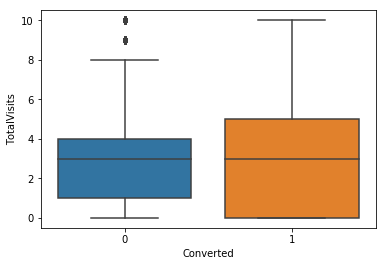

In [66]:
sns.boxplot(x=df['Converted'],y=df_num['TotalVisits'], data = df_num)

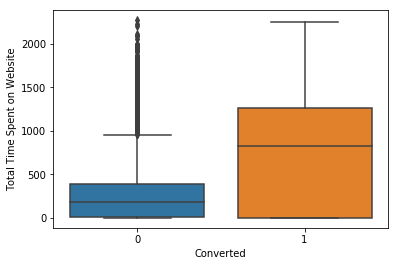

In [67]:
sns.boxplot(x=df['Converted'],y=df_num['Total Time Spent on Website'], data = df_num)

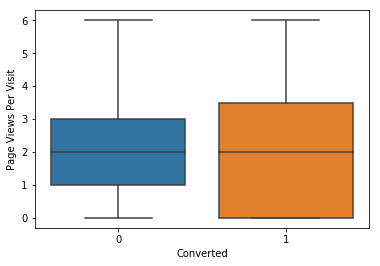

In [163]:
sns.boxplot(x=df['Converted'],y=df_num['Page Views Per Visit'], data = df_num)

#### Inferences:
1. TotalVisits - The median for both are same which means the number of visits is directly proportional to conversions
2. Total Time Spent on Website - The less time spent also have good conversions which means if customer spent more time so number can be gradually increase. so make website more attractive or add some design which make customer spent more time.
3. Page View Per Visit - Media is same as low page view can increase the conversion count so need to increase page views more

In [69]:
#Lets merge both df_cat and df_num to one

df_eda = pd.concat([df_cat, df_num], axis=1)
df_eda = pd.concat([df[['Prospect ID','Converted']],df_eda],axis=1)
df_eda.head()

,Prospect ID,Converted,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,Magazine,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,API,Olark Chat,No,Page Visited on Website,Other_specialization,Unemployed,No,Interested in other courses,Low in Relevance,Mumbai,No,Modified,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,API,Organic Search,No,Email Opened,Other_specialization,Unemployed,No,Ringing,Not Sure,Mumbai,No,Email Opened,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,No,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,Unemployed,No,Ringing,Not Sure,Mumbai,No,Modified,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,1,Landing Page Submission,Google,No,Converted to Lead,Other_specialization,Unemployed,No,Will revert after reading the email,Might be,Mumbai,No,Modified,2.0,1428,1.0


In [70]:
df_eda.shape

(9074, 17)

#### After EDA we have 15 columns

### Data Preparation

#### Convert binary values to 0 and 1

In [71]:
varlist =  ['Do Not Email', 'Magazine','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_eda[varlist] = df_eda[varlist].apply(binary_map)

#### Dummy Variables for Categorical variables to convert into numeric for model

In [72]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df_eda = dummies('Lead Origin',df_eda)
df_eda = dummies('Lead Source',df_eda)
df_eda = dummies('Last Activity',df_eda)
df_eda = dummies('Specialization',df_eda)
df_eda = dummies('What is your current occupation',df_eda)
df_eda = dummies('Tags',df_eda)
df_eda = dummies('Lead Quality',df_eda)
df_eda = dummies('City',df_eda)
df_eda = dummies('Last Notable Activity',df_eda)

In [73]:
df_eda.head()

,Prospect ID,Converted,Do Not Email,Magazine,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,...,Form Submitted on Website,Had a Phone Conversation,Last Notable Activity_SMS_Sent,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,Unreachable,Unsubscribed,View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,0.0,0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0,0,1,2.0,1532,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,0,1.0,305,1.0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,0,0,0,2.0,1428,1.0,1,0,...,0,0,0,1,0,0,0,0,0,0


#### Splitting the data into Training and Testing Sets

In [74]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)

# Putting feature variable to X
X = df_eda.drop(['Prospect ID','Converted'], axis=1)
y = df_eda['Converted']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 42)

#### Scaling the data using MinMax Scaler

In [75]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
#df_train
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

C:\Users\Jeevni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [76]:
X_train.head()

,Do Not Email,Magazine,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Facebook,...,Form Submitted on Website,Had a Phone Conversation,Last Notable Activity_SMS_Sent,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,Unreachable,Unsubscribed,View in browser link Clicked
1943,0,0,1,0.2,0.629827,0.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456,0,0,0,0.2,0.024856,0.333333,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6547,0,0,1,0.5,0.173546,0.833333,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8836,0,0,1,0.4,0.730138,0.666667,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6529,0,0,1,0.5,0.292943,0.833333,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [77]:
X_train.describe()

,Do Not Email,Magazine,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Facebook,...,Form Submitted on Website,Had a Phone Conversation,Last Notable Activity_SMS_Sent,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,Unreachable,Unsubscribed,View in browser link Clicked
count,6351.000000,6351.0,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.0,6351.000000,6351.000000,6351.0
mean,0.079987,0.0,0.317115,0.320501,0.216432,0.376972,0.539758,0.063769,0.003621,0.003621,...,0.000157,0.001575,0.237758,0.355692,0.022201,0.033381,0.0,0.003464,0.003936,0.0
std,0.271295,0.0,0.465389,0.278418,0.242568,0.295525,0.498456,0.244361,0.060074,0.060074,...,0.012548,0.039653,0.425744,0.478760,0.147349,0.179642,0.0,0.058759,0.062622,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,0.0,0.000000,0.100000,0.006436,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.000000,0.0,0.000000,0.300000,0.110963,0.333333,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.000000,0.0,1.000000,0.500000,0.411229,0.500000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [78]:
### Checking the Churn Rate
churn = (sum(df_eda['Converted'])/len(df_eda['Converted'].index))*100
churn

37.85541106458012

We have almost 38% conversion rate

#### After scaling min and max for all the columns should in in 0 and 1

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 1943 to 7413
Data columns (total 90 columns):
Do Not Email                              6351 non-null int64
Magazine                                  6351 non-null int64
A free copy of Mastering The Interview    6351 non-null int64
TotalVisits                               6351 non-null float64
Total Time Spent on Website               6351 non-null float64
Page Views Per Visit                      6351 non-null float64
Landing Page Submission                   6351 non-null uint8
Lead Add Form                             6351 non-null uint8
Lead Import                               6351 non-null uint8
Facebook                                  6351 non-null uint8
Google                                    6351 non-null uint8
Olark Chat                                6351 non-null uint8
Organic Search                            6351 non-null uint8
Others_lead_source                        6351 non-null uint8
Reference       

### Model Building

#### Running Your First Training Model

In [80]:
import statsmodels.api as sm

In [81]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1275.1
Date:                Mon, 26 Aug 2019   Deviance:                       2550.2
Time:                        16:45:43   Pearson chi2:                 2.42e+04
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     18.9538   2.13e+05   8.91e-05      1.000   -4.17e+05    4.17e+05
Do Not Email                              -1.0773      0.304     -3.546      0.000      -1.673      -0.482
Magazine                               -1.467e-09   1.18e-05     -0.000      1.000   -2.31e-05    2.31e-05
A free copy of Mastering The Interview    -0.2024      0.177     -1.142      0.254      -0.550       0.145
TotalVisits                                0.9141      0.308      2.968      0.003       0.310       1.518
Total Time Spent on Website                4.6296      0.260     17.833      0.000       4.121       5.138
Page Views Per Visit                      -0.8563      0.331     -2.585      0.010      -1.505      -0.207
Landing Page Submission                   -0.5742      0.221     -2.600      0.009      -1.007      -0.141
Lead Add Form                             -0.1449      1.357     -0.107      0.915      -2.805       2.515
Lead Import                                0.7294      0.425      1.718      0.086      -0.103       1.562
Facebook                                   0.7294      0.425      1.718      0.086      -0.103       1.562
Google                                    -0.0200      0.182     -0.110      0.913      -0.377       0.337
Olark Chat                                 0.9013      0.244      3.691      0.000       0.423       1.380
Organic Search                             0.1600      0.205      0.779      0.436      -0.243       0.563
Others_lead_source                         0.3292      0.915      0.360      0.719      -1.463       2.122
Reference                                  1.7905      1.411      1.269      0.205      -0.975       4.556
Referral Sites                            -0.2277      0.458     -0.497      0.619      -1.126       0.671
Welingak Website                           5.8128      1.702      3.416      0.001       2.477       9.148
Email Bounced                             -1.4923      0.964     -1.549      0.121      -3.381       0.396
Email Link Clicked                         0.7535      0.621      1.214      0.225      -0.463       1.970
Email Opened                               0.3084      0.394      0.783      0.434      -0.464       1.081
Form Submitted on Website                  0.6418      0.588      1.092      0.275      -0.510       1.794
Olark Chat Conversation                   -0.2585      0.397     -0.652      0.515      -1.036       0.519
Other_last_activity                        0.7743      1.197      0.647      0.518      -1.573       3.121
Page Visited on Website                   -0.0105      0.465     -0.023      0.982      -0.922       0.901
SMS Sent                                   1.2376      0.373      3.319      0.001       0.507       1.968
Unreachable                                0.9170      0.90

### Feature Selection Using RFE

In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(lr, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Magazine', False, 75),
 ('A free copy of Mastering The Interview', False, 51),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Landing Page Submission', False, 27),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 25),
 ('Facebook', False, 8),
 ('Google', False, 66),
 ('Olark Chat', False, 9),
 ('Organic Search', False, 57),
 ('Others_lead_source', False, 56),
 ('Reference', False, 67),
 ('Referral Sites', False, 43),
 ('Welingak Website', True, 1),
 ('Email Bounced', False, 22),
 ('Email Link Clicked', False, 35),
 ('Email Opened', False, 36),
 ('Form Submitted on Website', False, 34),
 ('Olark Chat Conversation', False, 24),
 ('Other_last_activity', False, 21),
 ('Page Visited on Website', False, 53),
 ('SMS Sent', False, 5),
 ('Unreachable', False, 19),
 ('Unsubscribed', False, 65),
 ('Business Administration', False, 28),
 ('E-Business', False, 52),
 ('E-COMMERCE', False, 33),
 ('Fin

In [84]:
# Value having True as selected as significant and number indicates the priority
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Welingak Website', 'Busy', 'Closed by Horizzon', 'Lost to EINS',
       'Ringing', 'Will revert after reading the email', 'invalid number',
       'opp hangup', 'switched off', 'Not Sure', 'Worst',
       'Last Notable Activity_SMS_Sent'],
      dtype='object')

In [85]:
# Value having False as selected as significant and number indicates the priority
X_train.columns[~rfe.support_]

Index(['Magazine', 'A free copy of Mastering The Interview', 'TotalVisits',
       'Page Views Per Visit', 'Landing Page Submission', 'Lead Import',
       'Facebook', 'Google', 'Olark Chat', 'Organic Search',
       'Others_lead_source', 'Reference', 'Referral Sites', 'Email Bounced',
       'Email Link Clicked', 'Email Opened', 'Form Submitted on Website',
       'Olark Chat Conversation', 'Other_last_activity',
       'Page Visited on Website', 'SMS Sent', 'Unreachable', 'Unsubscribed',
       'Business Administration', 'E-Business', 'E-COMMERCE',
       'Finance Management', 'Healthcare Management', 'Hospitality Management',
       'Human Resource Management', 'IT Projects Management',
       'International Business', 'Marketing Management',
       'Media and Advertising', 'Operations Management',
       'Other_specialization', 'Retail Management', 'Rural and Agribusiness',
       'Services Excellence', 'Supply Chain Management', 'Travel and Tourism',
       'Housewife', 'Other_occ

### Building model using statsmodel, for the detailed analysis

In [86]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Lead Add Form,Welingak Website,Busy,Closed by Horizzon,Lost to EINS,Ringing,Will revert after reading the email,invalid number,opp hangup,switched off,Not Sure,Worst,Last Notable Activity_SMS_Sent
1943,0,0.629827,0,0,0,0,0,1,0,0,0,0,1,0,0
456,0,0.024856,0,0,0,0,0,0,1,0,0,0,1,0,0
6547,0,0.173546,0,0,0,0,0,1,0,0,0,0,1,0,1
8836,0,0.730138,0,0,0,0,0,0,0,0,0,0,1,0,0
6529,0,0.292943,0,0,0,0,0,0,1,0,0,0,0,0,1


In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1411.7
Date:                Mon, 26 Aug 2019   Deviance:                       2823.5
Time:                        16:45:48   Pearson chi2:                 1.74e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.8900      0.231    -12.535      0.000      -3.342      -2.438
Do Not Email                           -1.3693      0.226     -6.070      0.000      -1.811      -0.927
Total Time Spent on Website             3.7578      0.206     18.255      0.000       3.354       4.161
Lead Add Form                           2.1099      0.362      5.831      0.000       1.401       2.819
Welingak Website                        3.6529      1.079      3.385      0.001       1.538       5.768
Busy                                    3.7047      0.331     11.202      0.000       3.057       4.353
Closed by Horizzon                      7.8742      0.778     10.118      0.000       6.349       9.400
Lost to EINS                            8.8805      0.768     11.561      0.000       7.375      10.386
Ringing                                -1.6329      0.336     -4.855      0.000      -2.292      -0.974
Will revert after reading the email     3.8748      0.237     16.370      0.000       3.411       4.339
invalid number                        -22.3306   1.36e+04     -0.002      0.999   -2.66e+04    2.66e+04
opp hangup                              2.7757      0.702      3.955      0.000       1.400       4.151
switched off                           -2.6223      0.669     -3.921      0.000      -3.933      -1.311
Not Sure                               -3.2514      0.131    -24.802      0.000      -3.508      -2.994
Worst                                  -3.7994      0.852     -4.460      0.000      -5.469      -2.130
Last Notable Activity_SMS_Sent          2.5917      0.127     20.329      0.000       2.342       2.842
=======================================================================================================
"""

In [88]:
col = col.drop('invalid number',1)

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.8
Date:                Mon, 26 Aug 2019   Deviance:                       2831.6
Time:                        16:45:48   Pearson chi2:                 1.74e+04
No. Iterations:                     9   Covariance Type:             nonrobust
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.9977      0.232    -12.923      0.000      -3.452      -2.543
Do Not Email                           -1.3600      0.225     -6.040      0.000      -1.801      -0.919
Total Time Spent on Website             3.7577      0.206     18.274      0.000       3.355       4.161
Lead Add Form                           2.1290      0.363      5.860      0.000       1.417       2.841
Welingak Website                        3.6304      1.080      3.363      0.001       1.515       5.746
Busy                                    3.8192      0.331     11.548      0.000       3.171       4.467
Closed by Horizzon                      7.9747      0.779     10.241      0.000       6.448       9.501
Lost to EINS                            8.9805      0.768     11.686      0.000       7.474      10.487
Ringing                                -1.5035      0.335     -4.483      0.000      -2.161      -0.846
Will revert after reading the email     3.9820      0.238     16.744      0.000       3.516       4.448
opp hangup                              2.8892      0.701      4.122      0.000       1.515       4.263
switched off                           -2.4892      0.668     -3.725      0.000      -3.799      -1.180
Not Sure                               -3.2454      0.131    -24.793      0.000      -3.502      -2.989
Worst                                  -3.7861      0.853     -4.439      0.000      -5.458      -2.114
Last Notable Activity_SMS_Sent          2.5632      0.126     20.277      0.000       2.315       2.811
=======================================================================================================
"""

In [90]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [91]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1943    0.004587
456     0.102688
6547    0.010652
8836    0.029326
6529    0.990513
7798    0.037640
2349    0.000741
5057    0.999660
3954    0.000162
4523    0.997626
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.58684359e-03, 1.02687782e-01, 1.06515799e-02, 2.93257191e-02,
       9.90512688e-01, 3.76400187e-02, 7.41368162e-04, 9.99660449e-01,
       1.61958784e-04, 9.97626302e-01])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.004587,1943
1,0,0.102688,456
2,0,0.010652,6547
3,0,0.029326,8836
4,1,0.990513,6529


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.004587,1943,0
1,0,0.102688,456,0
2,0,0.010652,6547,0
3,0,0.029326,8836,0
4,1,0.990513,6529,1


In [95]:
from sklearn import metrics

In [96]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3778  199]
 [ 314 2060]]


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9192253188474256


#### Checking VIFs

In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Will revert after reading the email,3.21
11,Not Sure,2.71
1,Total Time Spent on Website,1.89
7,Ringing,1.63
2,Lead Add Form,1.62
13,Last Notable Activity_SMS_Sent,1.54
3,Welingak Website,1.33
5,Closed by Horizzon,1.21
4,Busy,1.14
10,switched off,1.13


In [100]:
#Drop 'Will revert after reading the email' as having high VIF
col = col.drop('Will revert after reading the email', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Welingak Website', 'Busy', 'Closed by Horizzon', 'Lost to EINS',
       'Ringing', 'opp hangup', 'switched off', 'Not Sure', 'Worst',
       'Last Notable Activity_SMS_Sent'],
      dtype='object')

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1678.8
Date:                Mon, 26 Aug 2019   Deviance:                       3357.6
Time:                        16:45:49   Pearson chi2:                 1.38e+04
No. Iterations:                     8   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0373      0.096      0.389      0.697      -0.150       0.225
Do Not Email                      -1.4748      0.214     -6.903      0.000      -1.894      -1.056
Total Time Spent on Website        3.6554      0.185     19.733      0.000       3.292       4.018
Lead Add Form                      2.3611      0.308      7.662      0.000       1.757       2.965
Welingak Website                   3.7293      1.064      3.505      0.000       1.644       5.814
Busy                               0.2102      0.239      0.880      0.379      -0.258       0.678
Closed by Horizzon                 4.5794      0.749      6.111      0.000       3.111       6.048
Lost to EINS                       6.1894      0.833      7.431      0.000       4.557       7.822
Ringing                           -4.8178      0.260    -18.522      0.000      -5.328      -4.308
opp hangup                        -0.7293      0.676     -1.079      0.281      -2.054       0.596
switched off                      -5.6693      0.632     -8.972      0.000      -6.908      -4.431
Not Sure                          -2.6266      0.100    -26.391      0.000      -2.822      -2.431
Worst                             -5.9780      0.583    -10.253      0.000      -7.121      -4.835
Last Notable Activity_SMS_Sent     2.6958      0.118     22.820      0.000       2.464       2.927
==================================================================================================
"""

In [102]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1943    0.006031
456     0.075968
6547    0.016676
8836    0.519907
6529    0.978202
7798    0.630233
2349    0.001026
5057    0.999719
3954    0.000201
4523    0.994283
dtype: float64

In [103]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.03070070e-03, 7.59680879e-02, 1.66764162e-02, 5.19907006e-01,
       9.78201970e-01, 6.30232988e-01, 1.02560469e-03, 9.99719009e-01,
       2.00680499e-04, 9.94283458e-01])

#### Lets check the VIF again

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Not Sure,1.58
1,Total Time Spent on Website,1.52
2,Lead Add Form,1.50
12,Last Notable Activity_SMS_Sent,1.39
3,Welingak Website,1.32
7,Ringing,1.22
5,Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Busy,1.05
9,switched off,1.05


##### All variables have a good value of VIF. So we need not drop any variables and we can proceed with making predictions using this model only

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [105]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.006031,1943
1,0,0.075968,456
2,0,0.016676,6547
3,0,0.519907,8836
4,1,0.978202,6529


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.006031,1943,0
1,0,0.075968,456,0
2,0,0.016676,6547,0
3,0,0.519907,8836,1
4,1,0.978202,6529,1


In [107]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3648  329]
 [ 318 2056]]


In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8981262793260903


## Metrics beyond simply accuracy

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8660488626790227

In [111]:
# Let us calculate specificity
TN / float(TN+FP)

0.9172743273824491

In [112]:
# Calculate false postive rate - predicting churn when customer does not converted
print(FP/ float(TN+FP))

0.08272567261755091


In [113]:
# positive predictive value 
print (TP / float(TP+FP))

0.8620545073375262


In [114]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9198184568835098


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

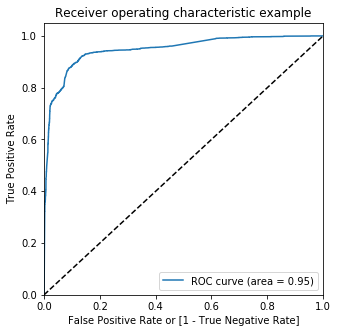

In [117]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006031,1943,0,1,0,0,0,0,0,0,0,0,0
1,0,0.075968,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.016676,6547,0,1,0,0,0,0,0,0,0,0,0
3,0,0.519907,8836,1,1,1,1,1,1,1,0,0,0,0
4,1,0.978202,6529,1,1,1,1,1,1,1,1,1,1,1


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373799  1.000000  0.000000
0.1   0.1  0.791844  0.946083  0.699774
0.2   0.2  0.879389  0.930497  0.848881
0.3   0.3  0.887734  0.908593  0.875283
0.4   0.4  0.894347  0.881634  0.901936
0.5   0.5  0.898126  0.866049  0.917274
0.6   0.6  0.888207  0.777169  0.954488
0.7   0.7  0.886160  0.735468  0.976113
0.8   0.8  0.872933  0.693766  0.979884
0.9   0.9  0.825224  0.555181  0.986422


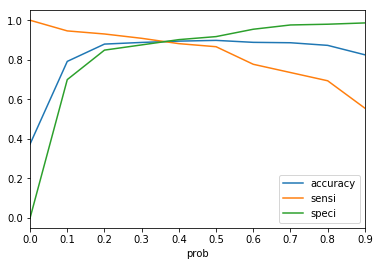

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006031,1943,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.075968,456,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.016676,6547,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.519907,8836,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.978202,6529,1,1,1,1,1,1,1,1,1,1,1,1


In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8877342150842387

In [123]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9085930918281382

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.8752828765401056

In [127]:
# Calculate false postive rate - predicting churn when customer does not converted
print(FP/ float(TN+FP))

0.1247171234598944


In [128]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8130418394270637


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9413196322336398


## Precision and Recall

In [130]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3648,  329],
       [ 318, 2056]], dtype=int64)

##### Precision
TP / TP + FP

In [131]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8620545073375262

##### Recall
TP / TP + FN

In [132]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8660488626790227

Using sklearn utilities for the same

In [133]:
from sklearn.metrics import precision_score, recall_score

In [134]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8620545073375262

In [135]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8660488626790227

### Precision and recall tradeoff

In [136]:
from sklearn.metrics import precision_recall_curve

In [137]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      0
 14      1
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      1
 24      0
 25      1
 26      0
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    0
 6330    1
 6331    1
 6332    0
 6333    0
 6334    0
 6335    1
 6336    0
 6337    0
 6338    0
 6339    1
 6340    1
 6341    0
 6342    1
 6343    0
 6344    0
 6345    0
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       0
 9       1
 10      0
 11      0
 12      1
 13      0
 14      1
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      1
 24      0
 25      

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

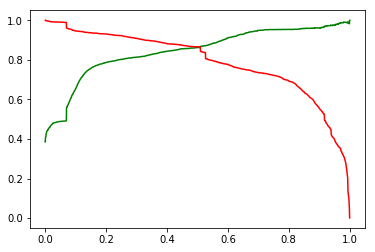

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [140]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

C:\Users\Jeevni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



,Do Not Email,Magazine,A free copy of Mastering The Interview,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Facebook,...,Form Submitted on Website,Had a Phone Conversation,Last Notable Activity_SMS_Sent,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,Unreachable,Unsubscribed,View in browser link Clicked
465,0,0,1,0.6,0.154489,1.000000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5424,0,0,0,0.4,0.301496,0.666667,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3503,0,0,0,0.0,0.000000,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4465,0,0,0,0.0,0.000000,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5394,0,0,0,0.4,0.072183,0.221667,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [141]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [142]:
y_test_pred = res.predict(X_test_sm)

In [143]:
y_test_pred[:10]

465     0.116648
5424    0.007856
3503    0.002623
4465    0.069831
5394    0.089039
7831    0.089039
2314    0.940948
7042    0.117490
5428    0.069831
4349    0.677426
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Let's see the head
y_pred_1.head()

,0
465,0.116648
5424,0.007856
3503,0.002623
4465,0.069831
5394,0.089039


In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [148]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [149]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [150]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,465,0.116648
1,0,5424,0.007856
2,0,3503,0.002623
3,0,4465,0.069831
4,0,5394,0.089039


In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [152]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [153]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,465,0,0.116648
1,5424,0,0.007856
2,3503,0,0.002623
3,4465,0,0.069831
4,5394,0,0.089039


In [154]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [155]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,465,0,0.116648,0
1,5424,0,0.007856,0
2,3503,0,0.002623,0
3,4465,0,0.069831,0
4,5394,0,0.089039,0


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.89386705839148

In [157]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1462,  200],
       [  89,  972]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9161168708765316

In [160]:
# Let us calculate specificity
TN / float(TN+FP)

0.8796630565583634

In [161]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006031,1943,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.075968,456,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.016676,6547,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.519907,8836,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.978202,6529,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning lead score 

In [162]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.006031,1943,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.075968,456,0,1,0,0,0,0,0,0,0,0,0,0,8
2,0,0.016676,6547,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0.519907,8836,1,1,1,1,1,1,1,0,0,0,0,1,52
4,1,0.978202,6529,1,1,1,1,1,1,1,1,1,1,1,1,98
